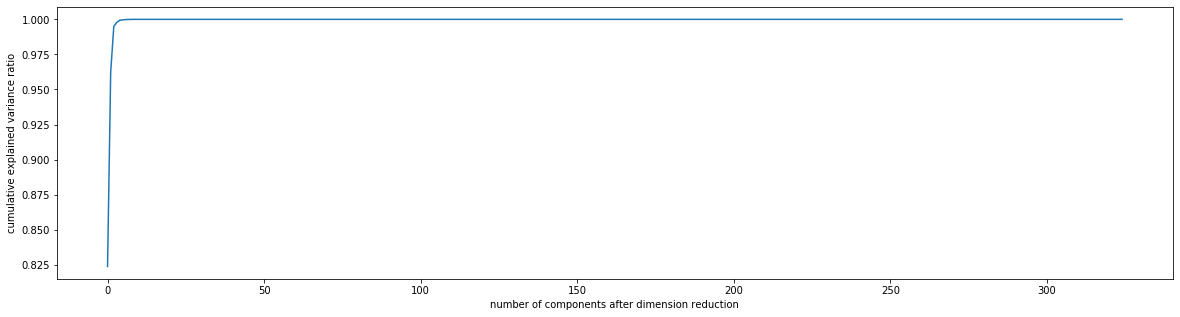

In [27]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


data = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv")
data = data.drop(columns = "id")
x = data.iloc[:,1:]
y = data.iloc[:,0]
x.shape

######主成分方差贡献率#######
pca_line = PCA().fit(x)
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()


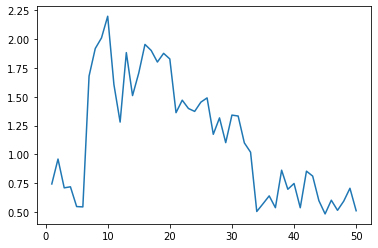

In [35]:
#######细化学习曲线########
mse_1= []
col_1 = range(1,51,1)
for i in col_1:
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFR(n_estimators = 20 ,random_state = 0),x_dr,y,cv = 10).mean()
    mse_1.append(once * -1)  
plt.plot(col_1,mse_1)
plt.show()


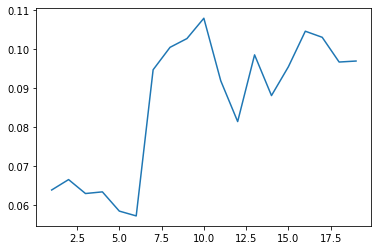

mse最小时所需要的降维为6,均方误差最小为0.05721385179924242


In [50]:
####细分学习曲线######
mse_2 = []
col_2 = range(1,20)
for i in col_2:
    x_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),x_dr,y,scoring = "neg_mean_squared_error",cv=10).mean()
    mse_2.append(once * -1)
plt.plot(col_2,mse_2)
plt.show()
n = np.argmin(mse_2)+1
print("mse最小时所需要的降维为{},均方误差最小为{}".format(n,mse_2[n-1])

In [ ]:
features = df.columns
importances = model.feature_importances_
indices = np.argsort(importances[0:9])  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [55]:
pca_6 = PCA(n).fit(x)
x_pca_6 = pca_6.transform(x)
var_6 = ["var1","var2","var3","var4","var5","var6"]
x_fe_6 = pd.DataFrame(x_pca_6,columns = var_6 )
x_fe_6

In [55]:

x_fe_poly = pd.DataFrame(kpca,columns = var_6 )
x_fe_poly

,var1,var2,var3,var4,var5,var6
0,-2.483239e+06,3.978102e+07,5.093466e+06,1.850039e+06,2.675902e+06,-689893.549510
1,-1.812626e+06,3.928231e+07,5.025032e+06,1.811607e+06,2.568340e+06,-647908.432916
2,-1.544522e+06,3.908168e+07,4.996871e+06,1.793837e+06,2.523036e+06,-627707.048678
3,-8.624506e+05,3.858143e+07,4.927339e+06,1.749538e+06,2.406607e+06,-574641.081072
4,-5.867796e+05,3.837372e+07,4.898023e+06,1.730665e+06,2.359341e+06,-552318.203225
...,...,...,...,...,...,...
320,-3.250548e+07,-3.336471e+07,4.672735e+07,-9.231458e+05,5.340736e+04,117201.705642
321,-3.215819e+07,-3.360191e+07,4.667642e+07,-6.540264e+05,1.076901e+04,223161.426630
322,-3.164112e+07,-3.395871e+07,4.659515e+07,-2.498255e+05,-5.631031e+04,383029.398359
323,-3.130135e+07,-3.419221e+07,4.653748e+07,2.181573e+04,-9.730401e+04,487660.146677


In [56]:
x_fe_6.to_csv(r"C:\Users\Administrator\Desktop\x_fe_6.csv")

In [57]:
features = x_fe_6.columns
importances = pca_6.feature_importances_
indices = np.argsort(importances[0:5])  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

AttributeError: 'PCA' object has no attribute 'feature_importances_'

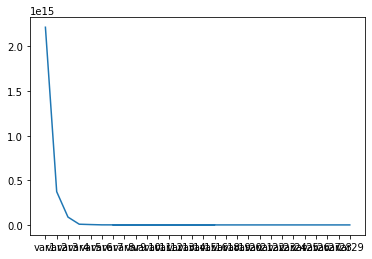

In [44]:
 plt.plot(x_fe.var())

In [45]:
x_fe.var()

var1     2.215666e+15
var2     3.725288e+14
var3     8.794599e+13
var4     7.977502e+12
var5     3.983118e+12
var6     6.852483e+11
var7     5.098471e+11
var8     1.819648e+11
var9     1.171598e+11
var10    1.290999e+10
var11    2.606390e+09
var12    1.381040e+09
var13    9.261459e+08
var14    8.211932e+08
var15    3.858556e+08
var16    3.487319e+08
var7     2.190848e+08
var18    1.081235e+08
var19    5.779925e+07
var20    4.914888e+07
var21    3.343176e+07
var22    2.383323e+07
var23    1.746118e+07
var24    9.067448e+06
var25    7.336841e+06
var26    6.589527e+06
var27    3.157163e+06
var28    1.328614e+06
var29    8.962297e+05
dtype: float64

In [23]:
var = ["var1","var2","var3","var4","var5","var6","var7","var8","var9"
       ,"var10","var11","var12","var13","var14","var15","var16","var7"
       ,"var18","var19","var20","var21","var22","var23","var24","var25"
       ,"var26","var27","var28","var29"]
x_fe = pd.DataFrame(x_pca,columns = var )

In [24]:
x_fe

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
320,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
321,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
322,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
323,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [25]:
x_fe.head()

,var1,var2,var3,var4,var5,var6,var7,var8,var9,var10,...,var20,var21,var22,var23,var24,var25,var26,var27,var28,var29
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [59]:
# -*- coding: utf-8 -*-
"""kNN和降维KernelPCA """
import numpy as np
import matplotlib.pyplot as plt
from sklearn import decomposition
def load_data():
    '''加载用于降维的数据。return: 一个元组，依次为训练样本集和样本集的标记'''
    data = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv")
    data = data.drop(columns = "id")
    x = data.iloc[:,1:]
    y = data.iloc[:,0]
    return  x,y
 
def test_KPCA(*data):
    '''测试 KernelPCA 的用法
 :param data: 可变参数。它是一个元组，这里要求其元素依次为：训练样本集、训练样本的标记
:return: None'''
    X,y=data
    kernels=['linear','poly','rbf','sigmoid']
    for kernel in kernels:
        kpca=decomposition.KernelPCA(n_components=None,kernel=kernel) # 依次测试四种核函数
        kpca.fit(X)
        print('kernel=%s --> lambdas: %s'% (kernel,kpca.lambdas_))
if __name__=='__main__':
    X,y=load_data() # 产生用于降维的数据集
    test_KPCA(X,y)   # 调用 test_KPCA

kernel=linear --> lambdas: [7.17875784e+17 1.20699335e+17 2.84945001e+16 2.58471075e+15
 1.29053030e+15 2.22020464e+14 1.65190461e+14 5.89565845e+13
 3.79597847e+13 4.18283745e+12 8.44470317e+11 4.47456830e+11
 3.00071279e+11 2.66066602e+11 1.25017205e+11 1.12989128e+11
 7.09834854e+10 3.50320128e+10 1.87269558e+10 1.59242377e+10
 1.08318900e+10 7.72196627e+09 5.65742322e+09 2.93785321e+09
 2.37713650e+09 2.13500678e+09 1.02292071e+09 4.30470844e+08
 2.90378425e+08 1.25799520e+08 8.29837962e+07 7.05191051e+07
 5.09115886e+07 4.14107929e+07 3.97076244e+07 3.57002025e+07
 2.83888783e+07 1.34794946e+07 1.19479488e+07 1.07874923e+07
 8.76608954e+06 5.34575653e+06 4.21218875e+06 3.65788258e+06
 2.82744647e+06 2.61901539e+06 1.97358617e+06 1.66038234e+06
 1.31883427e+06 1.15975680e+06 9.45287709e+05 9.14492851e+05
 7.89065074e+05]
kernel=poly --> lambdas: [6.64969085e+42 5.08671919e+41 2.59774896e+41 4.22820239e+40
 7.63712451e+39 9.85706441e+38 6.64031485e+38 4.83102829e+38
 4.12234428e+38 

In [77]:
data = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv")
data = data.drop(columns = "id")
x = data.iloc[:,1:]
y = data.iloc[:,0]
kernels=['linear','poly','rbf']
error_linear = []
for j in range(2,30):
    kpca=decomposition.KernelPCA(n_components=j,kernel="linear")
    kpca = kpca.fit_transform(x)
    once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),kpca,y,scoring = "neg_mean_squared_error",cv=10).mean()
    error_linear.append(once * -1)

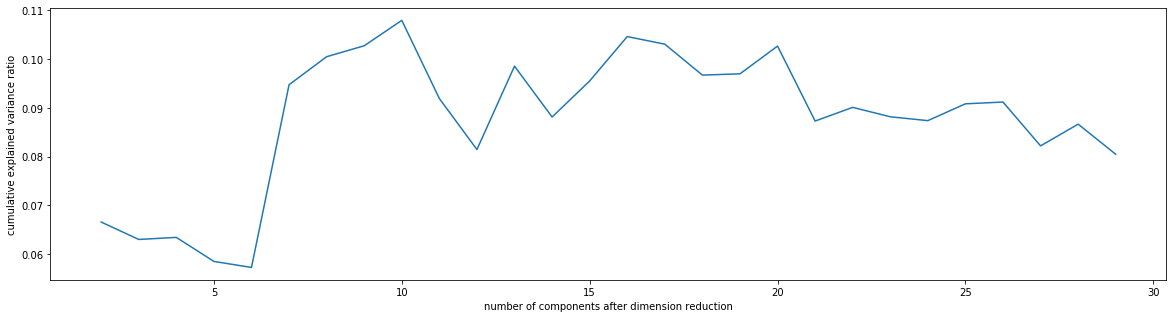

In [80]:
plt.figure(figsize=[20,5])
plt.plot(range(2,30),error_linear)
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()

In [84]:
n = np.argmin(error_linear)+2
n

6

In [86]:
print("mse最小时所需要的降维为{},均方误差最小为{}".format(n,error_linear[n-2]))

mse最小时所需要的降维为6,均方误差最小为0.05721385179924242


In [67]:
kpca=decomposition.KernelPCA(n_components=5,kernel=kernel)
kpca = kpca.fit_transform(x)
kpca.shape

(325, 5)

In [87]:
mse = [[1,2] , 2 , 3]
for i ,col in enumerate(mse) :
    print(i , col)

0 [1, 2]
1 2
2 3


In [91]:
data = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv")
data = data.drop(columns = "id")
x = data.iloc[:,1:]
y = data.iloc[:,0]
kernels=['linear','poly']
mse_linear = []
mse_poly = []
mse_rbf = []
for j in range(2,30):
    kpca=decomposition.KernelPCA(n_components=j,kernel="linear")
    kpca = kpca.fit_transform(x)
    once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),kpca,y,scoring = "neg_mean_squared_error",cv=10).mean()
    mse_linear.append(once * -1)
    
for j in range(2,30):
    kpca=decomposition.KernelPCA(n_components=j,kernel="poly")
    kpca = kpca.fit_transform(x)
    once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),kpca,y,scoring = "neg_mean_squared_error",cv=10).mean()
    mse_poly.append(once * -1)

In [106]:
y = y[:,np.newaxis]
y.shape

(325, 1)

In [107]:
x.shape

(325, 367)

mse最小时所需要的降维为6,均方误差最小为0.05721385179924242
mse最小时所需要的降维为26,均方误差最小为0.05356035511363637


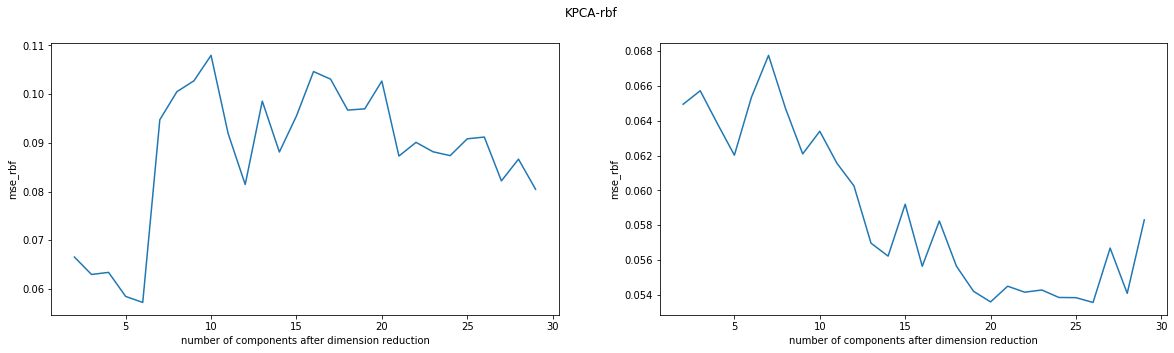

In [150]:
fig = plt.figure(figsize=[20,5])
mse = [mse_linear , mse_poly ]
for i ,col in enumerate(mse) :
    ax = fig.add_subplot(1,2,i+1)## 两行两列，每个单元显示核函数为 rbf 的 KernelPCA 一组参数的效果图
    ax.plot(range(2,30), col )
    ax.set_xlabel("number of components after dimension reduction")
    ax.set_ylabel("mse_rbf")
    n = np.argmin(col)+2
    print("mse最小时所需要的降维为{},均方误差最小为{}".format(n,col[n-2]))
plt.suptitle("KPCA-rbf")
plt.show()

In [149]:
n

54

mse最小时所需要的降维为6,均方误差最小为0.05610148910984849
mse最小时所需要的降维为5,均方误差最小为0.05675107717803031
mse最小时所需要的降维为6,均方误差最小为0.05800803503787879
mse最小时所需要的降维为6,均方误差最小为0.05334314157196969


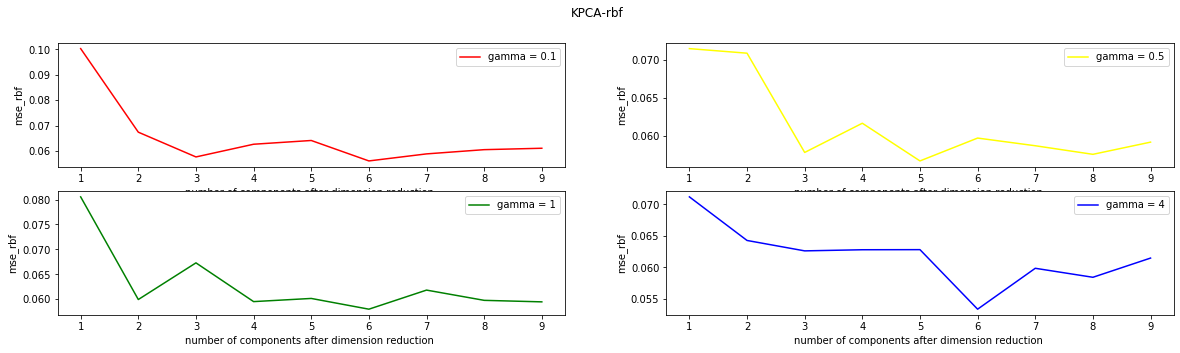

In [166]:
fig = plt.figure(figsize=[20,5])
colors = ["red" ,"yellow" ,"green" , "blue"]
Gammas=[0.1,0.5,1,4]
Gammas_char=["gamma = 0.1","gamma = 0.5","gamma = 1","gamma = 4"]# rbf 核的参数组成的列表。每个参数就是 gamma值
for i,gamma in enumerate(Gammas):
    mse_rbf = []
    for j in range(1,10):
        kpca=decomposition.KernelPCA(n_components=j,kernel='rbf',gamma=gamma)
        kpca = kpca.fit_transform(x)
        once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),kpca,y,scoring = "neg_mean_squared_error",cv=10).mean()
        mse_rbf.append(once * -1)
    ax = fig.add_subplot(2,2,i+1)## 两行两列，每个单元显示核函数为 rbf 的 KernelPCA 一组参数的效果图
    ax.plot(range(1,10), mse_rbf ,color = colors[i] ,label = Gammas_char[i])
    ax.set_xlabel("number of components after dimension reduction ")
    ax.set_ylabel("mse_rbf")
    ax.legend(loc="best")
    n = np.argmin(mse_rbf)+1
    print("{}的mse最小时所需要的降维为{},均方误差最小为{}".format(Gammas_char[i],n,mse_rbf[n-1]))
plt.suptitle("KPCA-rbf")
plt.show()

In [152]:
kernel

'poly'

In [168]:
data = pd.read_csv(r"C:\Users\Administrator\Desktop\table1_end_data.csv")
data = data.drop(columns = "id")
x = data.iloc[:,1:]
y = data.iloc[:,0]
kernels=['linear','poly']
mse_linear = []
mse_poly = []
for i in kernels:
    for j in range(2,30):
        kpca=decomposition.KernelPCA(n_components=j,kernel=i)
        kpca = kpca.fit_transform(x)
        once = cross_val_score(RFR(n_estimators=20,random_state= 0 ),kpca,y,scoring = "neg_mean_squared_error",cv=10).mean()
        if i == "linear" :
            mse_linear.append(once * -1)
        if i == "poly" :
            mse_poly.append(once * -1)
            

ValueError: Shape of passed values is (325, 2), indices imply (325, 26)

In [167]:
color = ["red" , "blue"]       
fig = plt.figure(figsize=[20,5])
mse = [mse_linear , mse_poly ]
mse_char = ["mse_linear" , "mse_poly" ]
for i ,col in enumerate(mse) :
    ax = fig.add_subplot(1,2,i+1)## 两行两列，每个单元显示核函数为 rbf 的 KernelPCA 一组参数的效果图
    ax.plot(range(2,30), col ,color = color[i] ,label = mse_char[i])
    ax.set_xlabel("number of components after dimension reduction")
    ax.set_ylabel(mse_char[i])
    ax.legend(loc="best")
    n = np.argmin(col)+2
    print("{}的mse最小时所需要的降维为{},均方误差最小为{}".format(mse_char[i],n,col[n-2]))
plt.suptitle("KPCA")
plt.show()

ValueError: Shape of passed values is (325, 2), indices imply (325, 26)

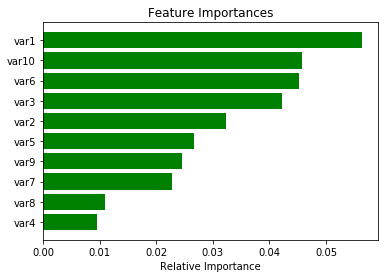

In [171]:
fig = plt.figure(figsize=[8,5] ,dpi = 250) 
kpca=decomposition.KernelPCA(n_components=26,kernel="poly")
kpca = kpca.fit_transform(x)
var_poly = ["var1","var2","var3","var4","var5","var6","var7","var8","var9"
       ,"var10","var11","var12","var13","var14","var15","var16","var7"
       ,"var18","var19","var20","var21","var22","var23","var24","var25"
       ,"var26"]
x_fe_poly = pd.DataFrame(kpca,columns = var_poly )
x_fe_poly.to_csv(r"C:\Users\Administrator\Desktop\x_fe_poly.csv")
fit_26 = RFR(n_estimators=20,random_state= 0).fit(x_fe_poly,y)
features = x_fe_poly.columns
importances = fit_26.feature_importances_
indices = np.argsort(importances[0:10])  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='g', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()      